# ML-Fundamentals - Logistic Regression and Regularization

Abgabe von Lara Neubauer da Costa Schertel
Ich habe zusammen mit Jasha Springmann gearbeitet

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Exercises - Multivariate Linear Regression](#Exercises---Multivariate-Linear-Regression)
  * [Pen & Paper Exercises](#Pen-&-Paper-Exercises)
  * [Data Generation](#Data-Generation)
  * [Logistic Function](#Logistic-Function)
  * [Cross-Entropy](#Cross-Entropy)
  * [Loss Function](#Loss-Function)
  * [Cost Function](#Cost-Function)
  * [Gradient Descent](#Gradient-Descent)
  * [Training and Evaluation](#Training-and-Evaluation)
      * [Plot Data and Decision Boundary](#Plot-Data-and-Decision-Boundary)
      * [Accuracy](#Accuracy)
  * [Regularization](#Regularization)
* [Summary and Outlook](#Summary-and-Outlook)
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction

In this exercise you will implement the *logistic regression*. Opposed to the *linear regression*, the purpose of this model is not to predict a continuous value (e.g. the temperature tomorrow), but to predict a certain class: For example, whether it will rain tomorrow or not. During this exercise you will:

1. Recap (and learn) the fundamentals of logistic regression: Costfunction, Gradient descent for logistic regression 
1. Implement the logistic function and plot it
1. Implement the hypothesis using the logistic function
1. Write a function to calculate the cross-entropy cost
1. Implement the loss function using the hypothesis and cost
1. Implement the gradient descent algorithm to train your model (optimizer) 
1. Visualize the decision boundary together with the data
1. Calculate the accuracy of your model
1. Extend your model with regularization
1. Calculate the gradient for the loss function with cross-entropy cost (pen&paper)

## Requirements
### Knowledge

You should have a basic knowledge of:
- Logistic regression
- Cross-entropy loss
- Gradient descent
- numpy
- matplotlib

Suitable sources for acquiring this knowledge are:
- [Logistic Regression Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/logistic-regression.php) by Christian Herta and corresponding [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/logisticRegression.pdf) (German)
- [Regularization Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/regularization.php) by Christian Herta and corresponding [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/regularization.pdf) (German)
- Chapter 5.1 of [Deep Learning](http://www.deeplearningbook.org/contents/ml.html) by Ian Goodfellow 
- Some parts of chapter 1 and 3 of [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) by Christopher M. Bishop
- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [1]:
# External Modules
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise - Logistic Regression



### Pen & Paper Exercises

#### Task

Why is 

$$
\text{arg}\max_x f(x) = \text{arg}\min_x \left[ - \log f(x) \right] 
$$

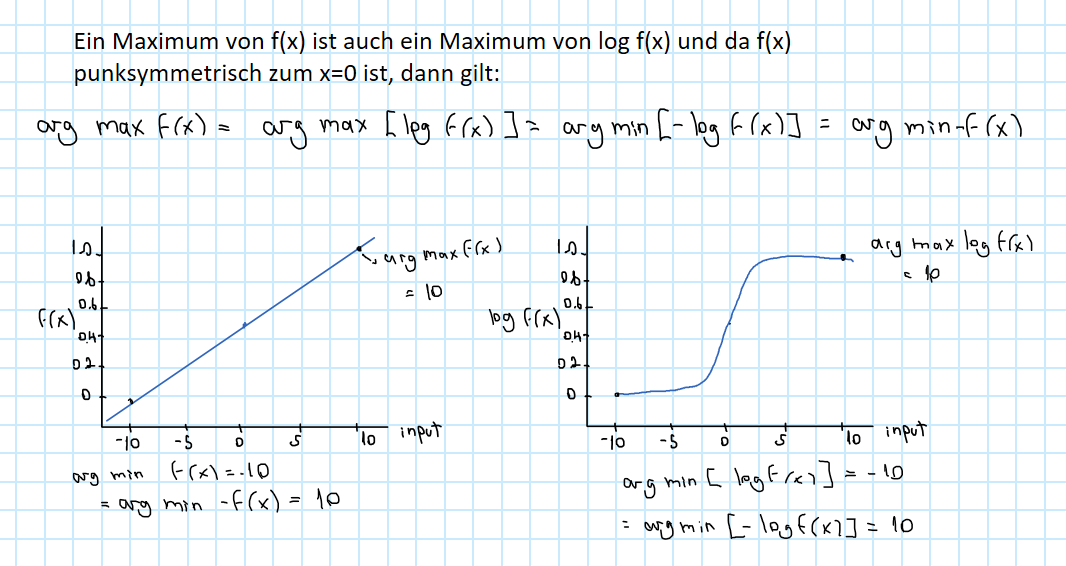

#### Logistic model

In logistic regression, the prediction of a learned model $h_\Theta(\vec x)$
can be interpreted as the prediction that $\vec x$ belongs to the positive class $1$:

$$p(y=1\mid \vec x; \Theta) = h_\Theta(\vec x)$$

#### Task
What is the probability of the negative class $p(y=0\mid \vec x; \Theta)$ prediction (expressed with $h_\Theta(\vec x)$)?

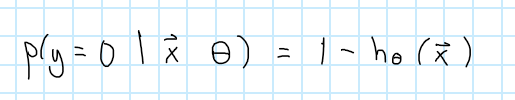

#### Loss


The loss of an example $(\vec x^{(i)}, y^{(i)})$ with target value $y^{(i)}=1$ is
$$loss_{(\vec x^{(i)}, 1)} (\Theta) = - \log p(y=1\mid \vec x; \Theta)$$

The loss of an example $(\vec x^{(i)}, y^{(i)})$ with target value $y^{(i)}=0$ is
$$loss_{(\vec x^{(i)}, 0)} (\Theta) = - \log p(y=0\mid \vec x; \Theta)$$

So, $p(y=k\mid \vec x; \Theta)$ is maximized for the target class $k$ "by searching
in the $\Theta$-space".  

$p(y=k\mid \vec x; \Theta)$ is called *likelihood* of $\Theta$ (of one example $(\vec x, y)$)
if it is considered as a function of $\Theta$. 
Note that the likelihood is a function of $\Theta$.

$\mathcal L^{(i)}(\Theta) = \log p(y^{(i)}\mid \vec x^{(i)}; \Theta)$ is the log-likelihood
of $\Theta$ for an example $i$.

Why is $p(y=k\mid \vec x; \Theta)$ not a probability with respect to $\Theta$.
Which property of a probability does not hold?

Bei der Likelihood Funktion steht Theta auf der rechten Seite der Bedingtzeichen, d.h. dass ist keine Wahrscheinlich bezüglich Theta, sondern bezüglich y. 
Ein probability gibt an, wie oft man ein bestimmtes Ergebnis eines Experiment beobachtet. Ein likelihood hat dieses Eigenschaft nicht, ein likelihood hat nur eine Hypothesis, die quantifiziert wie gut ein Modell ist.

#### i.i.d. and log-likelihood for all data

Note that the training data in logistic regression should be 
**i.i.d.** (independent and identically distributed):

An simple example of an i.i.d. data set is the toin coss of a (marked) coin.
Assume that the probability of head (class $y=1$) is $0.4$, i.e. $p(y=1)=0.4$.     
The probability of getting two heads in two throws is $0.4 \cdot 0.4$:
- Each throw has the same distribution (here: $p(y=1)=0.4$. Each throw of the same coin is **identically distributed**
- The throws are **independent**. If we get a head on the first throw the probability of
getting a head on the second throw does not change.

So, the probability factorizes: $p(y^{(1)}=1, y^{(2)}=1)=p(y^{(1)}=1)p(y^{(2)}=1)$

For our classification problem:

$p(\mathcal D_y \mid \mathcal D_x; \Theta) = \prod_i p(y=y^{(i)}\mid \vec x^{(i)}; \Theta)$ 

with 
- $\mathcal D_x= \{x^{(1)}, x^{(2)}, \dots , x^{(m)}\}$
- $\mathcal D_y= \{y^{(1)}, y^{(2)}, \dots , y^{(m)}\}$
- $\mathcal D$ is the combination of $\mathcal D_x$ with $\mathcal D_y$:
$\mathcal D= \{ (\vec x^{(1)},y^{(1)}), (\vec x^{(2)},y^{(2)}), \dots , (\vec x^{(m)},y^{(m)})\}$. 

#### Task 
For the whole data set the log-likelihood $\mathcal L_\mathcal D(\Theta)$ of a parameter set $\Theta$ is 
$\log p(\mathcal D_y \mid \mathcal D_x; \Theta)$).     
Note: The (log-)likelihood $\mathcal L_\mathcal D(\Theta)$ is a function of the parameters $\Theta$.
Never say the (log-)likelihood of the data.

1. What is $\mathcal L_\mathcal D(\Theta) = \log p(\mathcal D_y \mid \mathcal D_x; \Theta)$ expressed by the $p(y^{(i)}\mid \vec x^{(i)}; \Theta)$?

2. What is the relation of the log-likelihood $\mathcal L^{(i)}(\Theta)$ (for the individual examples $(\vec x^{(i)}, y^{(i)})$) 
to the log-likelihood $\mathcal L_\mathcal D(\Theta)$ for the whole data set.

  In logistic regression the cost function is the negative log-likelihood divided by the number of data examples $m$:

 $$J (\Theta) = - \frac{\mathcal L_\mathcal D(\Theta)}{m}$$

The average log-likelihood per data point.

2. What is the relation of the (log-)likelihood with the cost function for logistic-regression? 
3. Derive the cost function of logistic-regression by using your result of 2.

 1. Das ist die Likehelihood-Funktion für nur ein Datenpaar i.𝑝(𝑦(𝑖)∣𝑥⃗ (𝑖);Θ) ist die Wahrscheinlichkeit, dass  𝑦(𝑖) einen bestimmten Zielwert (1 oder 0) annimmt in Abhängigkeit von 𝑥⃗ (𝑖) und Θ.
 

2. 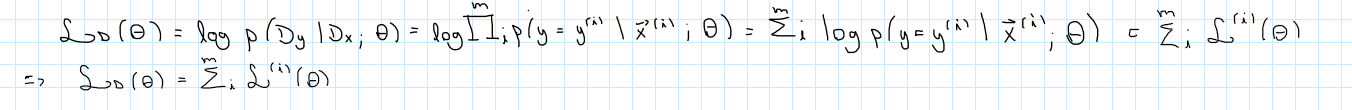

Die negative (log-)Likelihood berechnet die Kosten für ein 𝑥⃗ (𝑖) und die Cost Function ist die Summe von alle Kosten für den ganzen Datensatz durch die Anzahl der Daten.

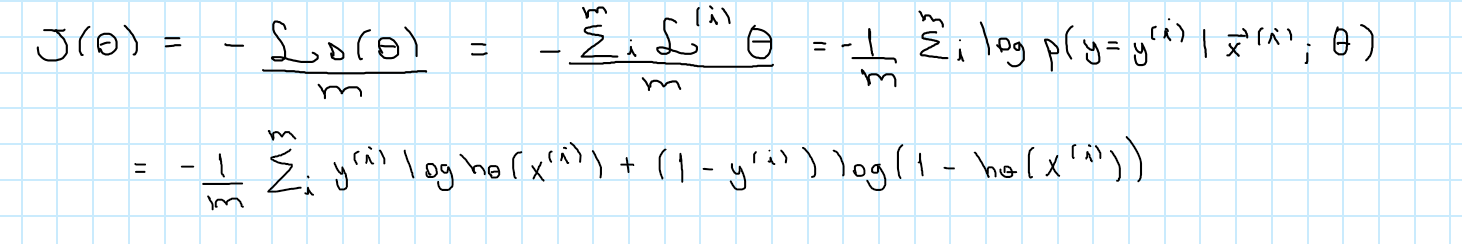


$$
h_\Theta(\vec x^{(i)}) = p(1\mid \vec x^{(i)}; \Theta)
$$

$$
1 - h_\Theta(\vec x^{(i)}) = p(0\mid \vec x^{(i)}; \Theta)
$$


#### Derivative of the logistic function

The sigmoid activation function is defined as $\sigma (z) = \frac{1}{1+\exp(-z)}$ 

**Task:**

Show that:
$$
\frac{d \sigma(z)}{d z} = \sigma(z)(1-\sigma(z))
$$

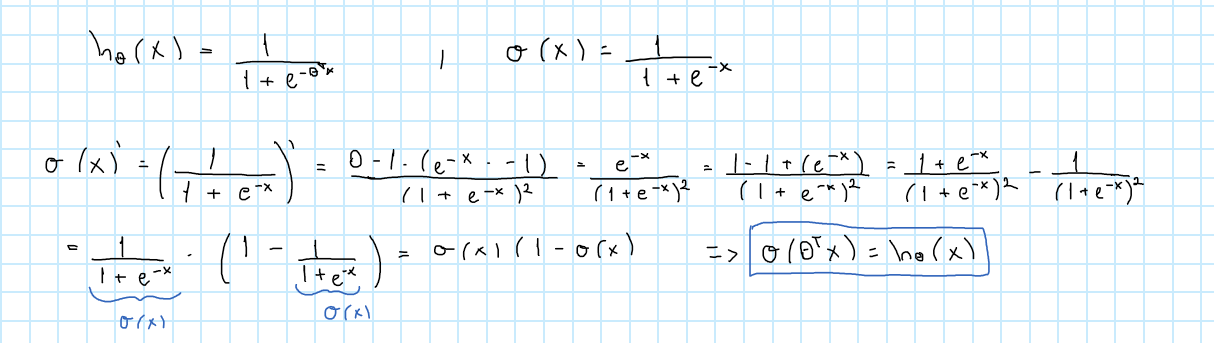


#### Task:

Now show that:
$$
\frac{\partial \sigma(z)}{\partial \theta_j} = \sigma(z)(1-\sigma(z)) \cdot x_j
$$


with 
- $z=\vec x'^T \vec \theta$

and
- $\vec \theta = (\theta_0, \theta_1, \dots, \theta_n)^T $
- $\vec x' = (x_0, x_1, \dots, x_n)^T $


Hint: Use the *chain rule of calculus*.

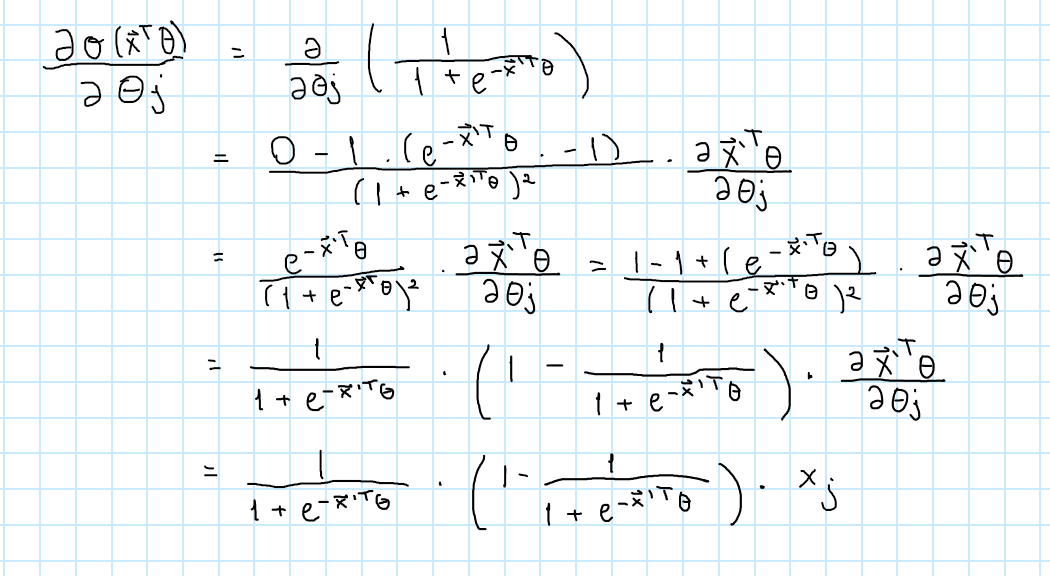

**Task:**

Show from
$$
    \frac{\partial}{\partial \theta_j}  J(\theta)  =  
    \frac{\partial}{\partial \theta_j}  \left( - \frac{1}{m}  \sum_{i=1}^{m} 
    \left[  y^{(i)} \log h_\theta({\vec x}^{(i)})+
      (1 - y^{(i)}) \log \left( 1- h_\theta({\vec x}^{(i)})\right) \right] \right)
$$  
that
$$
\frac{\partial}{\partial \theta_j}  J(\theta)  =   \frac{1}{m}
     \sum_{i=1}^{m} \left( h_\theta({\vec x}^{(i)})- y^{(i)}\right) x_j^{(i)}
$$

with the hypothesis $h_\theta(\vec x^{(i)}) = \sigma(\vec x'^T \vec \theta)$
So, with our classification cost function (from the max-likelihood principle) the 
partial derivatives (components the gradient) has a simple form.

**Hint:**

1. Make use of your knowledge, that:

$$
\frac{\partial h_\theta(\vec x^{(i)})}{\partial \theta_j} = h_\theta(\vec x^{(i)})(1-h_\theta(\vec x^{(i)})) \cdot x_j
$$
2. and note that the chain rule for the derivative of the log is:

$$
\frac{\partial \log(f(a))}{\partial a} = \frac{\partial \log(f(a))}{\partial f} \frac{\partial f(a)}{\partial a} =
\frac{1}{f(a)} \frac{\partial f(a)}{\partial a}
$$

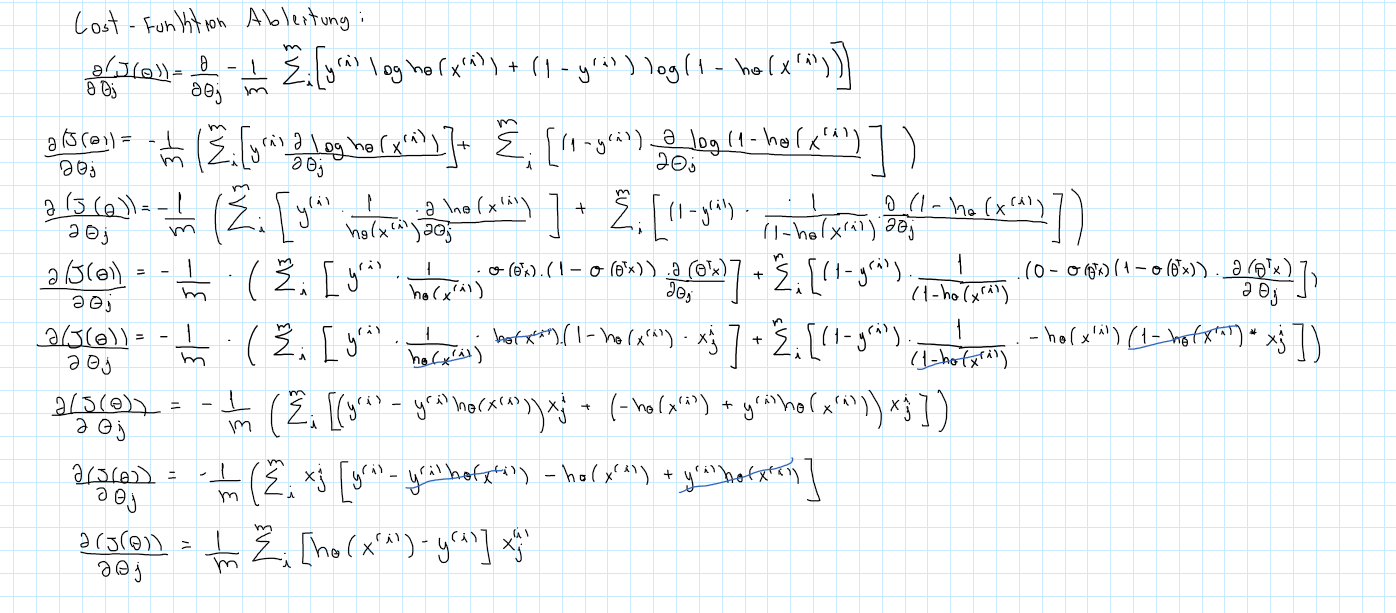

## Programming Exercises

For convenience and visualization, we will only use two features in this notebook, so we are still able to plot them together with the target class. But your implementation should also be capable of handling more (except the plots). 

### Data Generation

First we will create some artificial data. For each class, we will generate the features with bivariate (2D) normal distribution;

In [2]:
# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 1000

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
# number of data points
m1 = 1000

# generate m gaussian distributed data points with
# mean and cov.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)

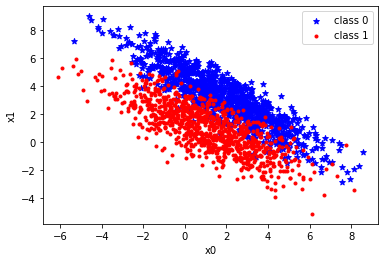

In [3]:
plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
plt.xlabel("x0")
plt.ylabel("x1")
plt.legend()
plt.show()

X = np.concatenate((r0,r1))
y = np.ones(len(r0)+len(r1))
y[:len(r0),] = 0

### Logistic Function

For the logistic regression, we want the output of the hypothesis to be in the interval $]0, 1[$. This is done using the *logistic function* $\sigma(.)$. The logistic function is also called *sigmoid function* in machine learning:

**Task:**

Implement the _logistic function_ and plot it in the interval of $[-10,10]$.

In [4]:
def logistic_function(x):
    """ Applies the logistic function to x, element-wise. """
    
    return (1 / (1+ np.exp(-x)))
        
    raise NotImplementedError("You should implement this function")
    
def plot_logistic_function(x_values):
    fig = plt.figure()
    ax = fig.add_subplot()
   
    ax.set_xlabel('input')
    ax.set_ylabel('logistic function')
    
    return ax.plot(x_values, logistic_function(x_values))
        
    raise NotImplementedError("You should implement this function")

### Insert code to plot the logistic function below


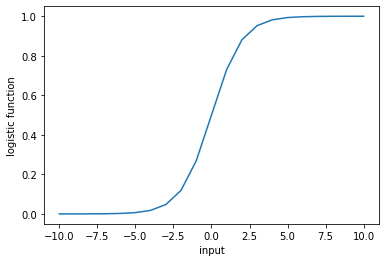

In [5]:
 x_values = (np.array(np.arange(-10, 10+1)))
plot_logistic_function( x_values)

### Logistic Hypothesis

The hypothesis in logistic regression is defined by:

$$
h_\Theta(\vec x) = \sigma(\vec x'^T \cdot \vec \theta)
$$

with:

$$
\vec x^T = \begin{pmatrix} 
x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}
\text{   and   }
\vec x'^T = \begin{pmatrix} 
x_0=1 & x_1 & x_2 & \ldots & x_n \\
\end{pmatrix}
$$

or for the whole data set $X$ and $X'$

$$
X = \begin{pmatrix} 
x_1^{(1)} & \ldots & x_n^{(1)} \\
x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots \\
x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
\text{   and   }
X' = \begin{pmatrix} 
1 & x_1^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & \ldots & x_n^{(2)} \\
\vdots &\vdots &\vdots &\vdots \\
1 & x_1^{(m)} & \ldots & x_n^{(m)} \\
\end{pmatrix}
$$


 - $n$ is the number of features
 - $m$ is the number of training data (examples)
 
 
**Task:**

Implement the logistic hypothesis using your implementation of the logistic function. `logistic_hypothesis` should return a function which accepts the training data $X$. Example usage:

`>> theta = np.array([1.1, 2.0, -.9])`

`>> h = logistic_hypothesis(theta) `

`>> print(h(X))`

**Note:** The training data was sampled with random noise, so the actual values of your h(X) may differ.

`array([0.03587382, 0.0299963 , 0.97389774, ...,`

**Hint:**

You may of course also implement a helper function for transforming $X$ into $X'$ and use it inside the `lamda` function of `logistic_hypothesis`.

In [6]:
def x_transform(x):
    return np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

def logistic_hypothesis(theta):
    
    return lambda x: logistic_function(x_transform(x).dot(theta))
    ''' Combines given list argument in a logistic equation and returns it as a function
    
    Args:
        thetas: list of coefficients
        
    Returns:
        lambda that models a logistc function based on thetas and x
    '''
    raise NotImplementedError("You should implement this function")

    

theta = np.array([1.1,2.0,-0.9])
h= logistic_hypothesis(theta)
print(h(X))

[0.01676527 0.99941353 0.87093334 ... 0.23701139 0.79383342 0.99945055]


### Cross-entropy

The cross-entropy loss for a data point $({\vec x}^{(i)}, y^{(i)})$ is defined by:

\begin{equation}
    \text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\vec \theta) = -y^{(i)} \cdot log(h_{\Theta} ({\vec x}^{(i)})) - (1-y^{(i)}) \cdot log(1-h_\Theta({\vec x}^{(i)}))
\end{equation}


with 
- the target class $y^{(i)} \in \{ 0, 1\}$ of the $i$-th data point 
- the parameters $\Theta$ packed in the vector $\vec \theta$.
- $h_{\Theta}({\vec x}^{(i)})$ the predition for the feature vector of the $i$-th data point $\vec x^{(i)}$ with the parameters $\Theta$ (resp. $\vec \theta$)


**Task:**

Implement the cross-entropy cost. This is the sum of the losses of all data $(X, \vec y)$.

Your python function should return a function, which accepts the vector $\vec \theta$.
This reflects the fact that $\text{loss}(\vec \theta)$ is a function of the parameter (vector).

The returned function should return the cost for each feature vector $\vec x^{(i)}$ and target $y^{(i)}$. The length of the returned array of costs therefore has to be the same length as $m$ (number of data examples).    
Example usage:

`>> J = cross_entropy_loss(logistic_hypothesis, X, y)`

`>> print(J(theta))`

**Note:** The training data was sampled with random noise, so the actual values of your h(X) may differ.


`array([ 7.3,  9.5, ....`

In [7]:
def cross_entropy_costs(h, X, y):
    
    return lambda theta: ((-y)*(np.log(h(theta)(X))) - (1 - y)*(np.log(1 - h(theta)(X))))
    ''' Implements cross-entropy as a function costs(theta) on given traning data 
    
    Args:
        h: the hypothesis as function
        x: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        
    Returns:
        lambda costs(theta) that models the cross-entropy for each x^i
    '''
    raise NotImplementedError("You should implement this function")

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
costs = cross_entropy_costs(logistic_hypothesis, X, y)
print(costs(theta))


[1.68355739e+01 8.53108016e+00 1.77276714e+01 ... 1.00006948e-02
 6.09792872e-04 7.88047586e-06]


### Loss Function

\begin{equation}
    J_{\mathcal D}(\vec \theta)=\frac{1}{m}\sum_{i=1}^{m}\left(\text{loss}_{({\vec x}^{(i)}, y^{(i)})}(\Theta)\right)
\end{equation}

- with the training data $\mathcal D = \{ (\vec x^{(1)}, y^{(1)}), \dots,  (\vec x^{(m)}, y^{(m)}) \}$ 

**Task:**

Now implement the loss function $J$, which calculates the mean costs for the whole training data $X$. Your python function should return a function, which accepts the vector $\vec \theta$.

**Note:** You can ignore the parameter `lambda_reg` for now, it is a hyperparameter for regularization. In a later exercise, you may revisit your implementation and implement regularization if you wish.

In [8]:

def mean_cross_entropy_costs(X, y, hypothesis, cost_func, lambda_reg=0.1):
    
    return lambda theta: 1/len(X) * sum(cost_func(hypothesis, X, y)(theta))
    
        

    ''' Implements mean cross-entropy as a function J(theta) on given traning data 
    
    Args:
        X: features as 2D array with shape (m_examples, n_features)  
        y: ground truth labels for given features with shape (m_examples)
        hypothesis: the hypothesis as function
        cost_func: cost function
        
    Returns:
        lambda J(theta) that models the mean cross-entropy
    '''
    raise NotImplementedError("You should implement this")
    
### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
J = mean_cross_entropy_costs(X,y, logistic_hypothesis, cross_entropy_costs, 0.1)
print(J(theta))

7.116106829951809


###  Gradient Descent

A short recap, the gradient descent algorithm is a first-order iterative optimization for finding a minimum of a function. From the current position in a (cost) function, the algorithm steps proportional to the negative of the gradient and repeats this until it reaches a local or global minimum and determines.
Stepping proportional means that it does not go entirely in the direction of the negative gradient, but scaled by a fixed value $\alpha$ also called the learning rate. Implementing the following formalized update rule is the core of the optimization process:

\begin{equation}
    \vec \theta_{new} \leftarrow \vec \theta_{{old}} - \alpha  \vec \nabla_\Theta J(\vec \theta_{old})
\end{equation}

**Task:**

Implement the function to update all $\theta$ values (in a vectorized way).

**Note:** You can ignore the parameter `lambda_reg` for now, it is a hyperparameter for regularization. In a later exercise, you may revisit your implementation and implement regularization.

In [9]:
def compute_new_theta(X, y, theta, learning_rate, hypothesis, lambda_reg=0.1):
     
    return theta - (1/len(X) * learning_rate * (sum((hypothesis(theta)(X) - y).dot(np.concatenate((np.ones((X.shape[0], 1)), X), axis=1).dot(np.ones((3, 1)))))))
    
    ''' Updates learnable parameters theta 
    
    The update is done by calculating the partial derivities of 
    the cost function including the linear hypothesis. The 
    gradients scaled by a scalar are subtracted from the given 
    theta values.
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        hypothesis: the hypothesis as function
        
        
    Returns:
        theta: Updated theta_0
    '''
    raise NotImplementedError("You should implement this")

### Uncomment to test your implementation
theta = np.array([1.,2.,3.])
theta = compute_new_theta(X, y, theta, .1, logistic_hypothesis, .1)
print(theta)

[0.70261984 1.70261984 2.70261984]


Using the `compute_new_theta` method, you can now implement the gradient descent algorithm. Iterate over the update rule to find the values for $\theta$ that minimize our cost function $J_D(\theta)$. This process is often called training of a machine learning model. 

**Task:**
- Implement the function for the gradient descent.
- Create a history of all theta and cost values and return them.

In [10]:
def gradient_descent(X, y, theta, learning_rate, num_iters, lambda_reg=0.1):
    
    array_t = np.empty((0, 0))
    array_c = np.empty((0))


    def helper(array_theta, array_cost, thetas, i):
        t = compute_new_theta(X, y, thetas, .1, logistic_hypothesis, lambda_reg)
        c = mean_cross_entropy_costs(X, y, logistic_hypothesis, cross_entropy_costs,0.1)(thetas)
        arrt= [t]
        arrc = [c]

        if (i == num_iters): 
            return array_cost, array_theta.reshape(num_iters, len(theta))
        else: 
            return helper(np.append(array_theta, arrt), np.append(array_cost, arrc), t, i+1)


    a, b = helper(array_t, array_c, theta, 0)


    return a, b

    
    
    ''' Minimize theta values of a logistic model based on cross-entropy cost function
    
    Args:
        X: 2D numpy array of x values
        y: array of y values corresponding to x
        theta: current theta values
        learning_rate: value to scale the negative gradient  
        num_iters: number of iterations updating thetas
        lambda_reg: regularization strength
        cost_function: python function for computing the cost
        
    Returns:
        history_cost: cost after each iteration
        history_theta: Updated theta values after each iteration
    '''
    raise NotImplementedError("You should implement this")


In [11]:
a, b = (gradient_descent(X, y, theta, .1, 100, lambda_reg=0.1))

### Training and Evaluation

**Task:**

Choose an appropriate learning rate, number of iterations and initial theta values and start the training

In [12]:
# TODO: Assign sensible values
alpha = .01
theta = np.array([3, 1, 1])
num_iters = 100
history_cost, history_theta = gradient_descent(X, y, theta, alpha, num_iters)

Now that the training has finished we can visualize our results.

**Task:**

Plot the costs over the iterations. Your plot should look similar to this one:

<img src="https://gitlab.com/deep.TEACHING/educational-materials/raw/dev/media/klaus/exercise-multivariate-linear-regression-costs.png" width="512" alt="internet connection needed">

In [13]:
def plot_progress(costs):
    
    fig = plt.figure()
    bx = fig.add_subplot()
   
    bx.set_xlabel('Iterationen')
    bx.set_ylabel('Kosten')

    return bx.plot(costs)
    
    """ Plots the costs over the iterations
    
    Args:
        costs: history of costs
    """
    raise NotImplementedError("You should implement this!")

costs before the training:	  4.010338893955752
costs after the training:	  0.43430732779010534


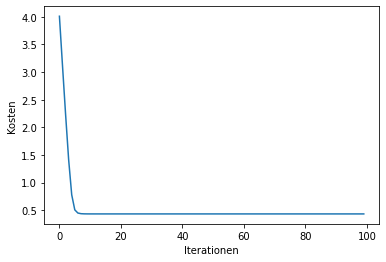

In [14]:
plot_progress(history_cost)
print("costs before the training:\t ", history_cost[0])
print("costs after the training:\t ", history_cost[-1])

#### Plot Data and Decision Boundary 

**Task:**

Now plot the decision boundary (a straight line in this case) together with the data.         

In [15]:
def plot_decision_boundary(theta):
    
    plt.scatter(r0[...,0], r0[...,1], c='b', marker='*', label="class 0")
    plt.scatter(r1[...,0], r1[...,1], c='r', marker='.', label="class 1")
    plt.xlabel("x0")
    plt.ylabel("x1")
    plt.legend()

    X = np.concatenate((r0,r1))
    y = np.ones(len(r0)+len(r1))
    
    
    plt.xlim([-6, 8])
    plt.ylim([-4, 10])
    
    
    xd = np.array(X[:,1])
    yd = -(theta[0]+theta[1]*xd)/theta[2]

     
    
    plt.plot(xd, yd, 'k', lw=1, ls='--')
   

    return plt.show()
    
    raise NotImplementedError("You should implement this!")


# Insert your code to plot below

[ 1.47912153 -0.52087847 -0.52087847]


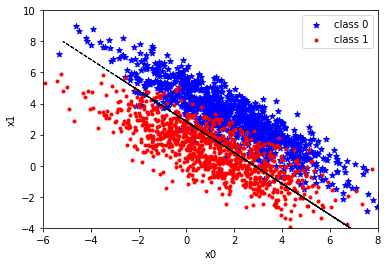

In [16]:
print(history_theta[-1])
plot_decision_boundary(history_theta[-1])

#### Accuracy

The logistic hypothesis outputs a value in the interval $]0,1[$. We want to map this value to one specific class i.e. $0$ or $1$, so we apply a threshold known as the decision boundary: If the predicted value is < 0.5, the class is 0, otherwise it is 1.

**Task:**

1. Calculate the accuracy of your final classifier. The accuracy is the proportion of the correctly classified data.
2. Why will the accuracy never reach 100% using this model and this data set?

In [17]:
def classifier_accuracy(theta, x0, x1):
    counter = 0    
    logistic_x0 = logistic_hypothesis(theta)(x0)
    for x in logistic_x0:
        if(x < 0.5):
            counter = counter+1
    
    logistic_x1 = logistic_hypothesis(theta)(x1)
    for y in logistic_x1:
        if(y >= 0.5):
            counter = counter+1
      
    return counter/(len(x1)+len(x0))

# Insert you code below

In [18]:
print(classifier_accuracy(history_theta[-1], r0, r1))

0.848


### Regularization

**Task:**
    
Extend your implementation with a regularization term $\lambda$ by adding it as argument to the functions `mean_cross_entropy_costs`, `compute_new_theta` and `gradient_descent`.


## Summary and Outlook

During this exercise you learned about logistic regression and used it to perform binary classification on multidimensional data. You should be able to answer the following questions:
* How can you interpret the output of the logistic function?
* For which type of problem do you use linear regression and for which type of problem do you use logistic regression?

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Logistic Regression and Regularization <br/>
by Christian Herta, Klaus Strohmenger <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.